In [37]:
import numpy as np
import json
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from tqdm import tqdm
import re
import pandas as pd
import string

plt.style.use("fivethirtyeight")
%matplotlib inline

In [38]:
# Load the data
twitter_data_dir = "../data/authorship_corpora/influencer_tweets.json"
json_data=open(twitter_data_dir).read()
twitter_data = json.loads(json_data)

## Dataset Details

In [3]:
# How many Tweets
print("Number of Tweets: {}".format(len(twitter_data)))
print()

# How many Users
count_ = {}

for item in twitter_data:
    user = item['user']
    if user not in count_.keys():
        count_[user] = 1
    else:
        count_[user] += 1
    
print("Number of Influencers: {}".format(len(count_.keys())))
print()

print("Top Influencers")
print("---------------")
print()
# Top influencers
for influencer, count in sorted(count_.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Influencer Twitter ID: {}".format(influencer))
    print("# of tweets: {}".format(count))
    print()

Number of Tweets: 1004399

Number of Influencers: 4391

Top Influencers
---------------

Influencer Twitter ID: AmericanAir
# of tweets: 27960

Influencer Twitter ID: LonelyOakradio
# of tweets: 15204

Influencer Twitter ID: DavidPapp
# of tweets: 13246

Influencer Twitter ID: KLM
# of tweets: 6905

Influencer Twitter ID: oye_gujju
# of tweets: 6302

Influencer Twitter ID: thehill
# of tweets: 6259

Influencer Twitter ID: marshawright
# of tweets: 5960

Influencer Twitter ID: united
# of tweets: 5419

Influencer Twitter ID: businessinsider
# of tweets: 5387

Influencer Twitter ID: BritishVogue
# of tweets: 5086



In [ ]:
# Distribution of the length of the tweets
char_len = []
word_len = []
tknzr = TweetTokenizer()

# takes 5 mins to run
for tweet in tqdm(twitter_data):
    words = tknzr.tokenize(tweet['text'].lower())
    words = [''.join(c for c in s if c not in list(string.punctuation)) for s in words]
    while '' in words:
        words.remove('')
    char_len.append(len(tweet['text'].lower()))
    word_len.append(len(words))

In [ ]:
char_len = np.array(char_len)
word_len = np.array(word_len)

Mean: 101.00660470445936
SD: 32.02788980293797
Min: 4
25%: 79.0
50%: 107.0
75%: 129.0
Max: 158
Prop. below 140 chars: 0.977894133749244


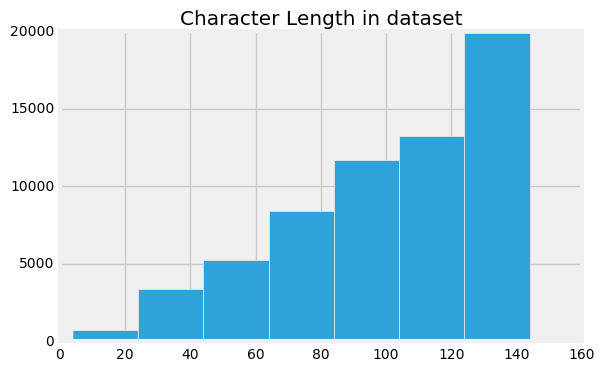

In [7]:
# Character Length
print("Mean: {}".format(np.mean(char_len)))
print("SD: {}".format(np.std(char_len)))
print("Min: {}".format(np.min(char_len)))
print("25%: {}".format(np.percentile(char_len, 25)))
print("50%: {}".format(np.percentile(char_len, 50)))
print("75%: {}".format(np.percentile(char_len, 75)))
print("Max: {}".format(np.max(char_len)))
plt.hist(char_len, bins = np.arange(min(char_len), max(char_len), 20))
print("Prop. below 140 chars: {}".format(np.mean(char_len<=140)))
plt.title("Character Length in dataset")

There seems to be about 3% of the tweets that exceed those 140 character limit. 

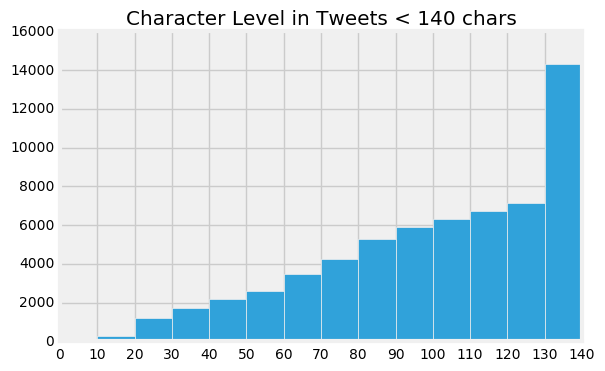

In [8]:
plt.hist(char_len[char_len<=140], bins = np.arange(0, 141, 10))
plt.title("Character Level in Tweets < 140 chars")
tix = plt.xticks(np.arange(0, 141, 10))

Mean: 13.707785593786804
SD: 5.316457818599716
Min: 1
25%: 10.0
50%: 14.0
75%: 17.0
Max: 36


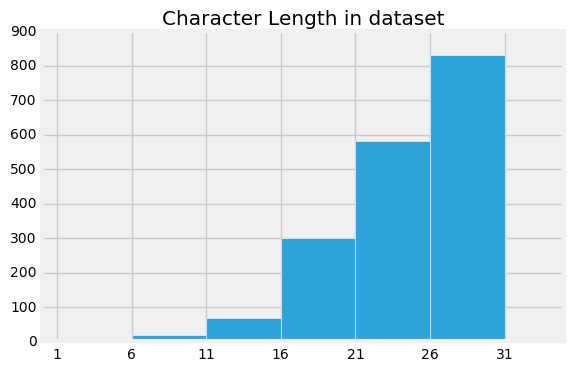

In [9]:
# Word Length
print("Mean: {}".format(np.mean(word_len)))
print("SD: {}".format(np.std(word_len)))
print("Min: {}".format(np.min(word_len)))
print("25%: {}".format(np.percentile(word_len, 25)))
print("50%: {}".format(np.percentile(word_len, 50)))
print("75%: {}".format(np.percentile(word_len, 75)))
print("Max: {}".format(np.max(word_len)))
plt.hist(char_len, bins = np.arange(min(word_len), max(word_len), 5))
plt.title("Character Length in dataset")
tix = plt.xticks(np.arange(min(word_len), max(word_len), 5))

In [3]:
# How many tweets contain a link or other username?
text = []
author = []

twitter_username_regex = '@([A-Za-z0-9_]+)'
link_regex = '(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'


for t in tqdm(twitter_data):
    text.append(t['text'])
    author.append(t['user'])
    
data = pd.DataFrame.from_dict({"author":author, "text":text})

is_response = lambda x: int(re.search(twitter_username_regex, x) == None)
has_link = lambda x: int(re.search(link_regex, x) == None)
data['char_len'] = data['text'].str.len()
data['is_response'] = data['text'].apply(is_response) 
data['has_link'] = data['text'].apply(has_link) 

data.head()

100%|██████████| 1004399/1004399 [00:01<00:00, 530340.40it/s]


,author,text,char_len,is_response,has_link
0,mattyglesias,"@ianmpgray She was already trade critic, right?",47,0,1
1,GuidoKerkhof,@wadeharman You are very welcome - keep writin...,82,0,1
2,VirginAmerica,"@gambino Hi there, please send us a DM if we c...",56,0,1
3,CreativeLive,It could be your lucky day! Join @jeremycowart...,96,0,0
4,sfsignal,The Functional Nerds interview Tina Connolly h...,68,1,0


In [4]:
print("Proportion of Tweets that contain a link: {}".format(np.mean(data['has_link'])))
print("Proportion of Tweets that are a response: {}".format(np.mean(data['is_response'])))

Proportion of Tweets that contain a link: 0.3491301763542178
Proportion of Tweets that are a response: 0.5446839353683148


In [ ]:
# Let's find all the unique symbols used in the corpus
symbols = {}

for t in tqdm(data['text']):
    for s in t:
        if s not in symbols.keys():
            symbols[s] = 1
        else:
            symbols[s] += 1

In [6]:
# all characters
print("Number of unique characters: {}".format(len(set(symbols.keys()))))
list(set(symbols.keys()))[:10] # emoticons ...

Number of unique characters: 1073


['🎲', '🇽', '🔑', '😒', '\u202f', '⇠', '오', '🙅', '📱', '🕣']

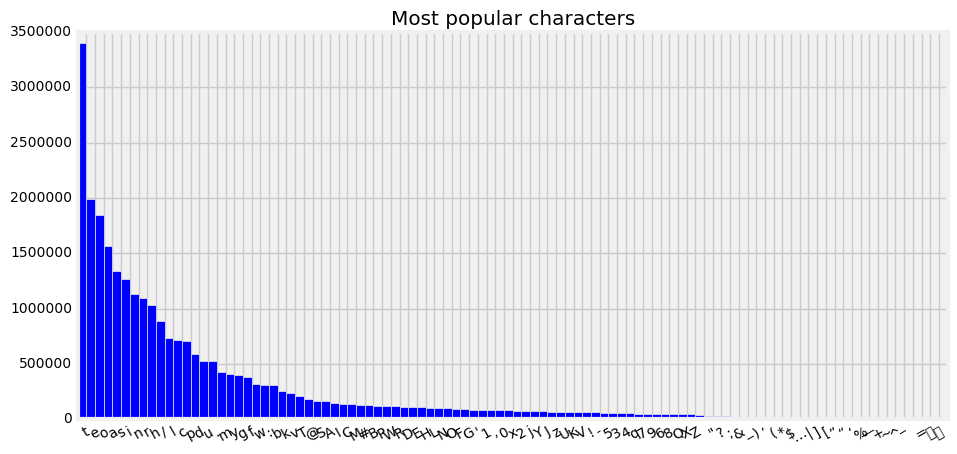

In [7]:
# most popular characters
plt.figure(figsize=(10, 5))
top_100 = sorted(symbols.items(), key = lambda x: x[1], reverse=True)[:100]
plt.bar(np.arange(100), width=1, height = [tmp[1] for tmp in top_100])
tix = plt.xticks(np.arange(100), [tmp[0] for tmp in top_100], rotation=30)
plt.title("Most popular characters")

## Proposed Preprocessing

* Keep tweets with a maximum of 140 characters.
* We need some minimum text length that we can work with.
* What to do with responses/links.
* Some care should be taken when making a vocabulary of characters (introduce <ukn> token perhaps?).
* In the paper, Ruder et al. lower case everything but I actually think that case is an indicator of style so should probably leave it as it is.
* Probably also need to add a character for padding.

## Training a single-channel, non-static character level model

This will be our attempt to replicate the results of the paper from Ruder et al.

In [39]:
# Only keep tweets less than 140 and more than 10 characters
filtered_data = data[np.logical_and(data['char_len']>=10, data['char_len']<=140)]
filtered_data['author'].value_counts()

AmericanAir        27949
LonelyOakradio     15198
DavidPapp          13240
thehill             6259
oye_gujju           6220
marshawright        5791
KLM                 5665
businessinsider     5382
united              5313
BritishVogue        5056
piercearrow33       4923
MicrosoftHelps      4817
manila_bulletin     4633
ndtv                4456
flickeringmyth      4347
business            4190
HeathrowAirport     4074
MarshaCollier       3978
BruceVH             3937
Pooja__G            3884
LinuxForYou         3859
EconomicTimes       3821
LoriMoreno          3749
Windows             3698
Slate               3619
Inc                 3576
IsraelNewsNow       3570
NGRGUARDIANNEWS     3557
kimgarst            3542
ANI_news            3541
                   ...  
treylayton             1
mpoppendieck           1
williejpro             1
simonhelberg           1
ahmetchz               1
Yelawolf               1
ChristianDeker         1
dr_ahmetkuru           1
Hussein_Gaza           1


In [40]:
# select 10 authors for preliminary experiments (try for diversity)
author_list = ['AmericanAir', 'LonelyOakradio', 'DavidPapp', 'oye_gujju', 'marshawright', 'piercearrow33', 
               'MicrosoftHelps','MarshaCollier', 'BruceVH', 'Pooja__G']
selected_authors = filtered_data[filtered_data['author'].isin(author_list)]
selected_authors.head()

,author,text,char_len,is_response,has_link
8,AmericanAir,@StephanieQuayle Thanks for the #cyberhug for ...,98,0,1
10,MicrosoftHelps,@catherine_ycf Allow us to put an end to this!...,117,0,1
11,AmericanAir,@mholzke Link is perfect! We'll share your kin...,102,0,1
66,LonelyOakradio,#NowPlaying Built To Spill - Some Things Last ...,103,1,0
80,AmericanAir,@Chic_Wood We know you don't want to miss your...,86,0,1


In [41]:
# vocabulary
symbols = {}

for t in tqdm(selected_authors['text']):
    for s in t:
        if s not in symbols.keys():
            symbols[s] = 1
        else:
            symbols[s] += 1

100%|██████████| 89937/89937 [00:02<00:00, 30523.10it/s]


In [42]:
sorted_chars = sorted(symbols.items(), key = lambda x: x[1], reverse = True)
vocabulary = [x[0] for x in sorted_chars]
len(vocabulary)

253

In [43]:
# keep the characters that appear more than 100 times
vocab = pd.DataFrame(sorted_chars, columns=["character", "count"])
above100 = vocab[vocab['count']>=100]
above100_chars = above100['character'].values

replace = lambda x: x if x in above100_chars else '<ukn>'
vocab['vocab_character_updated'] = vocab['character'].apply(replace)
vocab.head()

,character,count,vocab_character_updated
0,,1222354,
1,e,682863,e
2,t,570810,t
3,o,550029,o
4,a,483117,a


In [44]:
# add another character that corresponds to padding
tempo = pd.DataFrame.from_dict({"character":["<pad>"], "count":[1222354], "vocab_character_updated":["<pad>"]})
vocab = tempo.append(vocab)
vocab.head()

,character,count,vocab_character_updated
0,<pad>,1222354,<pad>
0,,1222354,
1,e,682863,e
2,t,570810,t
3,o,550029,o


In [45]:
dicti = {}
count = 0
for t in sorted(list(set(vocab['vocab_character_updated']))):
    dicti[t] = count
    count += 1

In [46]:
# save the dictionary in a json file
import json

with open('../outputs/Nov11_char_dic.json', 'w') as fp:
    json.dump(dicti, fp)

In [47]:
def translate_tweet(tweet):
    lst = list(tweet)
    vec = []
    for c in lst:
        if c not in dicti.keys():
            vec.append(dicti['<ukn>'])
        else:
            vec.append(dicti[c])
    if len(vec)<140:
        vec += [0]*(140-len(vec))
    return np.array(vec)

training_data = selected_authors['text'].apply(translate_tweet)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(author_list)
target_authors = le.transform(selected_authors['author'])
target_authors

array([0, 5, 0, ..., 2, 3, 2])

In [60]:
# save for future use
np.save("../outputs/10_user_X_Nov_11.npy", training_data)
np.save("../outputs/10_user_y_Nov_11.npy", target_authors)